## Creating mass ratio and period distributions and then assigning these values randomly to each binary pair

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random

In [2]:
def period_of_binary(num_of_stars): 
    mu, sigma = 5.03, 2.28 
    distribution = np.random.normal(mu, sigma, num_of_stars) 
    period = random.choice(distribution)  
    return period 

def mass_ratio_of_binary(num_of_stars): 
    mass_ratio = random.uniform(0.1, 1) 
    return mass_ratio 

In [8]:
binaries = pd.read_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/G_with_binaries.csv')

periods = [] 
mass_ratios = [] 

for i in range(0, len(binaries['# Index'])): 
    period = period_of_binary(1000) 
    mass_ratio = mass_ratio_of_binary(1000) 
    periods.append(period)
    mass_ratios.append(mass_ratio)
    
print(len(binaries))
print(len(mass_ratios))
print(len(periods))

32422
32422
32422


In [6]:
# Save a new CSV file with all the columns 
full_sample_array = np.column_stack((binaries,periods,mass_ratios))
np.savetxt('/Users/Jess/sf_m_dwarfs/sf_data_files/G_with_binaries_with_parameters.csv', full_sample_array, delimiter=',', header='Index,Gc,logAge,M_H,m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,Kepler,g,r,i,z,DDO51_finf,J,H,Ks,Mact,periods,mass_ratios')
binaries_with_parameters = full_sample_array

32422


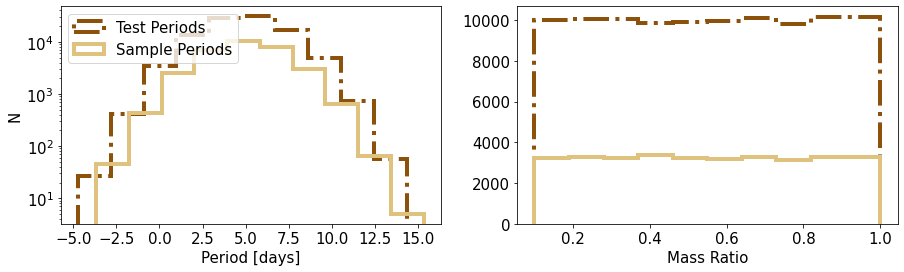

In [7]:
numbers = np.linspace(0, 100000, 100000)
print(len(binaries_with_parameters))
test_periods = []
test_mass_ratios = []
for i in numbers:
    a = period_of_binary(10000)
    test_periods.append(a)
for i in numbers: 
    a = mass_ratio_of_binary(10000)
    test_mass_ratios.append(a)

plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.hist(test_periods, histtype='step', label='Test Periods', color='#8c510a', linewidth=4, linestyle='-.')
plt.hist(periods, label='Sample Periods', histtype='step', linewidth=4, color='#dfc27d')
plt.legend(loc=2, fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Period [days]', fontsize=15)
plt.yscale('log')
plt.subplot(122)
plt.hist(test_mass_ratios, histtype='step', color='#8c510a', linewidth=4, linestyle='-.')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Mass Ratio', fontsize=15)
plt.hist(mass_ratios, histtype='step', linewidth=4, color='#dfc27d')
plt.savefig('/Users/Jess/sf_m_dwarfs/sf_plots/P_period_mass_ratio.png')
plt.show()